In [ ]:
import matplotlib
import seaborn as sns

matplotlib.use("TkAgg")
import matplotlib.pyplot as plt

import sys

sys.path.append(".\\scripts\\")
import load_and_save_data as Data
import data_procedures as DPro
import calculate as calc
import visualisations as vs

df = Data.load_data_frame(month="03")
df = (
    df.pipe(DPro.rename_columns)
    .pipe(DPro.join_zones)
    .pipe(DPro.join_payment_type)
    .pipe(DPro.drop_unnecessary_columns)
)


df = DPro.filtered_by_date(df)

general_dataframe = (
    df.pipe(DPro.add_week_day)
    .pipe(DPro.get_time_groups)
    .pipe(DPro.group_by_time_weekdays)
    .pipe(calc.calculate_passengers_fare_index)
)


vs.show_heatmap(general_dataframe, by=f"tip")
plt.show(block=True)


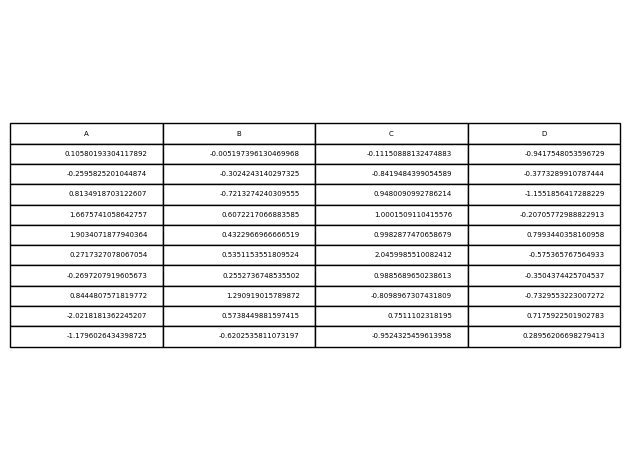

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

ax.table(cellText=df.values, colLabels=df.columns, loc='center')

fig.tight_layout()

plt.show()